![](presentasi.png "judul gambar")

Berikut adalah flowchart keseluruhan dari BOT:

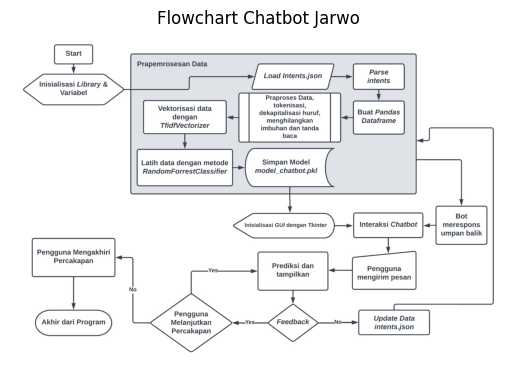

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "Diagram.jpg"

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  
plt.title("Flowchart Chatbot Jarwo")
plt.show()

Pertama-tama kita harus menginisialisasi library yang dibutuhkan.

Library dalam Python adalah kumpulan modul atau fungsi yang telah dikembangkan sebelumnya oleh orang lain dan dapat digunakan oleh pengguna untuk memudahkan pengembangan aplikasi. Library mengandung kode yang telah ditulis untuk melakukan tugas-tugas umum, seperti pengolahan data, manipulasi string, pemrosesan gambar, pengembangan web, dan masih banyak lagi.

Dalam Python, library biasanya disimpan dalam file terpisah dan diimpor ke dalam program melalui pernyataan import. Dengan menggunakan library, pengguna dapat menghindari menulis kode dari awal untuk tugas yang telah dilakukan sebelumnya oleh orang lain, sehingga mempercepat pengembangan aplikasi.

Ada banyak library yang tersedia dalam Python, termasuk library standar Python, seperti os, sys, dan math, serta library pihak ketiga, seperti NumPy, Pandas, Matplotlib, dan Scikit-learn. Pengguna dapat memilih library yang paling sesuai dengan kebutuhan mereka dan mengimpor fungsi atau modul tertentu dari library tersebut ke dalam program Python mereka.

Jadi, alasan mengapa Anda perlu memasukkan library dalam Python adalah karena Anda dapat menghemat waktu dan usaha dalam pengembangan aplikasi, serta memperluas kemampuan Python Anda dengan memanfaatkan fungsi dan modul yang telah dikembangkan sebelumnya oleh orang lain.

In [1]:
import string #Library ini menyediakan konstanta-konstanta string dan fungsi-fungsi yang berguna untuk manipulasi string.
import time #Library ini menyediakan fungsi-fungsi untuk mengakses waktu dan mengelola waktu.
import json #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format JSON.
import pickle #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format pickle.
import numpy as np #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format array.
import pandas as pd #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format dataframe.
from sklearn.pipeline import make_pipeline #Library ini menyediakan fungsi-fungsi untuk membuat pipeline.
from util import JSONParser #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format JSON.
import tkinter as tk #Library ini menyediakan fungsi-fungsi untuk membuat GUI.
from tkinter import ttk as ttk #Library ini menyediakan fungsi-fungsi untuk membuat GUI.
from tkinter import simpledialog as simpledialog #Library ini menyediakan fungsi-fungsi untuk membuat GUI.
from tkinter import messagebox as messagebox #Library ini menyediakan fungsi-fungsi untuk membuat GUI.
import cv2 #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format gambar.
from PIL import Image, ImageTk #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format gambar.
import re as regex #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format string.
from sympy import * #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format matematika.
from collections import deque #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format array.
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format string.
from concurrent.futures import ThreadPoolExecutor #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format multithreading.
from functools import lru_cache #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format cache.
from math import * #Library ini menyediakan fungsi-fungsi untuk mengolah data dalam format matematika.

Kemudian tahap selanjutnya adalah mendefinisikan kelas Marquee yang merupakan subkelas dari tk.Canvas. Kelas ini digunakan untuk membuat label bergerak (scrolling label) yang terus berulang pada antarmuka grafis Tkinter. Parameter-parameter yang diterima oleh fungsi ini adalah:

1. parent: objek induk yang digunakan sebagai wadah untuk objek Marquee.
2. text: teks yang akan ditampilkan pada objek Marquee.
3. width: lebar objek Marquee.
4. height: tinggi objek Marquee.
5. speed: kecepatan pergerakan teks pada objek Marquee. Defaultnya adalah -2.
6. **kw: argumen opsional lainnya yang dapat diteruskan ke konstruktor tk.Canvas.

In [4]:
class Marquee(tk.Canvas): # Class ini digunakan untuk membuat marquee pada GUI.
    def __init__(self, parent, text, width, height, speed=-2, **kw): # Fungsi ini digunakan untuk menginisialisasi class Marquee.
        super().__init__(parent, **kw) # Fungsi ini digunakan untuk menginisialisasi class Canvas.
        self.speed = speed # Fungsi ini digunakan untuk menginisialisasi variabel speed.
        self.text = text # Fungsi ini digunakan untuk menginisialisasi variabel text.

        self.label = tk.Label(self, text=text, font=('Arial Rounded', 15), fg="black", bg="dark grey") # Fungsi ini digunakan untuk menginisialisasi label.
        self.update_idletasks() # Fungsi ini digunakan untuk mengupdate GUI.
        self.configure(width=width, height=height, highlightthickness=0) # Fungsi ini digunakan untuk menginisialisasi ukuran canvas.
        
        # Mengatur posisi awal label di tengah-tengah secara horizontal
        initial_x = (width - self.label.winfo_reqwidth()) // 2 
        initial_y = (height - self.label.winfo_reqheight()) // 2

        # Fungsi ini digunakan untuk menginisialisasi posisi label.
        self.create_window(initial_x, initial_y, window=self.label, anchor='nw', tags=("text",)) 
        self.after(0, self.scroll) # Fungsi ini digunakan untuk menginisialisasi fungsi scroll.

    def scroll(self): # Fungsi ini digunakan untuk mengatur pergerakan label.
        self.move("text", self.speed, 0) # Fungsi ini digunakan untuk menggerakkan label.
        if self.bbox("text")[0] + self.label.winfo_reqwidth() <= 0:  # Fungsi ini digunakan untuk mengatur posisi label.
            self.move("text", self.label.winfo_reqwidth() + self.winfo_width(), 0) 
        self.after(10, self.scroll) # Fungsi ini digunakan untuk menginisialisasi fungsi scroll.

    def destroy_marquee(self): # Fungsi ini digunakan untuk menghentikan pergerakan label.
        self.destroy()

Kemudian tahap selanjutnya adalah mengimplementasikan fungsi praproses data untuk teks chat yang menggunakan teknik memoisasi dan paralelisasi untuk meningkatkan kinerja dan efisiensi. Dengan teknik memoisasi dan paralelisasi yang digunakan dalam fungsi praproses data ini, diharapkan dapat meningkatkan efisiensi dan kinerja program dalam melakukan pemrosesan data teks chat.Pada bagian load data, data diambil dari file JSON intents.json, kemudian di-parse menggunakan objek JSONParser dan hasilnya disimpan dalam sebuah dataframe df. Selanjutnya, kolom baru text_input_prep dibuat dengan menerapkan fungsi preprocess pada setiap nilai di kolom text_input. Pada bagian pemodelan, sebuah pipeline dibuat menggunakan make_pipeline dari scikit-learn. Pipeline ini terdiri dari dua komponen: TfidfVectorizer dan RandomForestClassifier. TfidfVectorizer digunakan untuk mengubah teks input menjadi vektor numerik dengan fitur-fitur TF-IDF, sedangkan RandomForestClassifier digunakan sebagai algoritma klasifikasi untuk mengenali intent atau tujuan dari pesan. Selanjutnya, pada bagian train, pipeline dilatih menggunakan metode fit dengan argumen df.text_input_prep sebagai input dan df.intents sebagai target. Setelah itu, model tersebut disimpan ke dalam file "model_chatbot.pkl" menggunakan modul pickle.

In [5]:
# Fungsi dengan memoisasi untuk lematisasi kata
@lru_cache(maxsize=None)
def stem_word(stemmer, word): 
    return stemmer.stem(word)

# Fungsi praproses data dengan memoisasi
@lru_cache(maxsize=None)
def preprocess(chat): # Fungsi ini digunakan untuk melakukan praproses data.
    
    chat = chat.lower() # Fungsi ini digunakan untuk mengubah semua huruf menjadi huruf kecil.
    translator = str.maketrans('', '', string.punctuation)
    chat = chat.translate(translator) # Fungsi ini digunakan untuk menghilangkan tanda baca.
    chat = chat.split() # Fungsi ini digunakan untuk memisahkan kata-kata.
    factory = StemmerFactory() # Fungsi ini digunakan untuk menginisialisasi stemmer.
    stemmer = factory.create_stemmer() # Fungsi ini digunakan untuk menginisialisasi stemmer.
    
    # Paralelisasi lematisasi dengan memoisasi menggunakan list comprehension
    with ThreadPoolExecutor() as executor:
        chat = ' '.join([executor.submit(stem_word, stemmer, word).result() for word in chat])
    
    return chat # Fungsi ini digunakan untuk mengembalikan hasil praproses data.

print("[INFO] Sabar sebentar ya kak, aku lagi belajar ...") 

[INFO] Sabar sebentar ya kak, aku lagi belajar ...


Kemudian tahap selanjutnya adalah mengimplementasikan fungsi yang bertujuan untuk menampilkan teks secara gradual pada widget teks di antarmuka grafis Python menggunakan modul tkinter. Fungsi ini mengambil tiga argumen yaitu text_widget, text, dan delay.

In [6]:
# fungsi untuk menampilkan teks dari respons bot secara gradual
def display_text_gradually(text_widget, text, delay=0.085, tag=None): 
    text_widget.configure(state='normal') # Fungsi ini digunakan untuk menginisialisasi state text widget.
    for char in text: # Fungsi ini digunakan untuk menginisialisasi karakter.
        text_widget.insert(tk.END, char, tag)   
        text_widget.update() # Fungsi ini digunakan untuk mengupdate GUI.
        time.sleep(delay) # Fungsi ini digunakan untuk mengatur delay.
    text_widget.configure(state='disabled') # Fungsi ini digunakan untuk menginisialisasi state text widget.
    

Contoh teks yang di-print secara gradual

In [7]:
import sys
import time

# Fungsi untuk menampilkan teks secara gradual di terminal
def display_text_gradually_terminal(text, delay=0.085):
    for char in text:
        sys.stdout.write(char)
        sys.stdout.flush()
        time.sleep(delay)
    print()  # Print newline character setelah teks selesai ditampilkan

# Contoh penggunaan
text = "Halo, ini adalah contoh teks yang ditampilkan secara gradual di terminal.\n"
display_text_gradually_terminal(text)

Halo, ini adalah contoh teks yang ditampilkan secara gradual di terminal.



Kemudian tahap selanjutnya adalah mengimplementasikan dua fungsi yang digunakan dalam kalkulator sederhana untuk memproses dan menampilkan hasil ekspresi matematika. Berikut adalah penjelasan dari setiap fungsi tersebut:

1. def format_ribuan(angka): Pada baris pertama fungsi, terdapat sebuah percabangan if-else yang mengecek apakah nilai "angka" adalah bilangan bulat atau bukan. Jika nilai "angka" adalah bilangan bulat, maka nilai "angka" akan diubah menjadi bilangan bulat menggunakan fungsi int(angka). Setelah itu, nilai "angka" akan diformat menjadi format ribuan menggunakan f-string dengan format specifier :,. Di sini, koma (,) digunakan untuk memisahkan setiap tiga digit angka, dan titik (.) digunakan sebagai pemisah desimal. Selanjutnya, titik (.) akan diganti dengan koma (,) dan koma (,) akan diganti dengan X. Kemudian, X akan diganti dengan titik (.) kembali. Hasil akhirnya adalah string yang berisi angka dalam format ribuan.

Jika nilai "angka" bukan bilangan bulat, maka nilai "angka" akan diformat menjadi format ribuan dengan dua angka desimal menggunakan f-string dengan format specifier :,.2f. Proses penggantian koma (,) dan titik (.) serta penggunaan X untuk sementara kemudian dijelaskan seperti pada percabangan sebelumnya.

2. def kalkulator(expression): Kode ini merupakan fungsi untuk menghitung hasil dari ekspresi matematika yang diberikan sebagai argumen. Fungsi ini menggunakan beberapa manipulasi string untuk mengubah simbol "x" menjadi "*" dan simbol ":" menjadi "/", sehingga ekspresi matematika dapat dihitung dengan benar menggunakan fungsi simplify() dari library SymPy. Setelah itu, hasil ekspresi diformat dengan menggunakan fungsi format_ribuan() yang telah dijelaskan sebelumnya. Jika ekspresi tidak valid, maka fungsi akan mengembalikan pesan kesalahan "Ekspresi matematika tidak valid".

In [ ]:
def format_ribuan(angka): # Fungsi ini digunakan untuk mengubah format angka menjadi ribuan.
    # Kode di bawah ini menggunakan fungsi int() untuk mengecek apakah angka merupakan bilangan bulat atau tidak. 
    if angka == int(angka): 
        angka = int(angka)
        return f"{angka:,}".replace(",", "X").replace(".", ",").replace("X", ".")
    else:
        return f"{angka:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")


def replace_operator(match): # Fungsi ini digunakan untuk mengganti operator matematika.
    operators = {
        "dikali": "*", # Kode ini untuk mengganti dikali dengan *
        "kali": "*", # Kode ini untuk mengganti kali dengan *
        "x": "*", # Kode ini untuk mengganti x dengan *
        "X": "*", # Kode ini untuk mengganti X dengan *
        "dibagi": "/", # Kode ini untuk mengganti dibagi dengan /
        "bagi": "/", # Kode ini untuk mengganti bagi dengan /
        ":": "/", # Kode ini untuk mengganti : dengan /
        "ditambah": "+", # Kode ini untuk mengganti ditambah dengan +
        "tambah": "+", # Kode ini untuk mengganti tambah dengan +
        "dikurangi": "-", # Kode ini untuk mengganti dikurangi dengan -
        "kurang": "-", # Kode ini untuk mengganti kurang dengan -
        "mod": "%" # Kode ini untuk mengganti mod dengan %
    }
    return operators[match.group()]  # Kode ini untuk mengembalikan hasil penggantian operator matematika.

def kalkulator(expr): # Fungsi ini digunakan untuk menghitung hasil dari ekspresi matematika.
    try:
        # Kode di bawah ini menggunakan modul regex dan regex pattern untuk mengganti operator matematika 
        # yang ditulis dalam bahasa sehari-hari (seperti "dikali", "dibagi", "tambah", "kurang") 
        # dengan operator matematika yang sesuai. Fungsi replace_operator digunakan sebagai pengganti untuk operator-operator tersebut.
        expression = regex.sub(r'\b(?:dikali|kali|[xX]|dibagi|bagi|ditambah|tambah|dikurangi|kurang|mod|:)\b', replace_operator, expr)  
        expression = regex.sub(r'\s+', '', expression)  # Kode ini untuk menghilangkan spasi
        result = eval(expression) # Kode ini untuk menghitung hasil dari ekspresi matematika
        result_formatted = format_ribuan(result) # Kode ini untuk mengubah format angka
        return f"Hasil dari {expr} adalah {result_formatted}" # Kode ini untuk mengembalikan hasil dari ekspresi matematika
    except Exception as e: # Kode ini untuk menangani kesalahan
        print(e)  # Tambahkan ini untuk melihat kesalahan yang terjadi
        return "Ekspresi matematika tidak valid" # Kode ini untuk mengembalikan pesan kesalahan

def match_math_expression(chat): # Fungsi ini digunakan untuk mencocokkan ekspresi matematika.
    math_expr = regex.findall(r'\d+\s*(?:dikali|dibagi|ditambah|dikurangi|mod|kali|tambah|kurang|bagi|[xX\/*+\-:])\s*\d+', chat)  
    return math_expr

Kemudian tahap selanjutnya adalah mengimplementasikan fungsi bot_response yang digunakan untuk memproses teks chat dari pengguna dan memberikan respons yang sesuai menggunakan model machine learning. 

In [ ]:
# Membuat struktur data untuk menyimpan 3 pertanyaan terakhir
recent_questions = deque(maxlen=3) # Kode ini untuk membuat deque dengan panjang maksimal 3

def bot_response(chat, pipeline, jp): # Fungsi ini digunakan untuk membuat respons dari bot.
    global recent_questions # Kode ini untuk mengakses variabel global recent_questions
    recent_questions.append(chat) # Kode ini untuk menambahkan chat ke recent_questions

    same_question_count = recent_questions.count(chat) # Kode ini untuk menghitung jumlah chat yang sama di recent_questions

    if same_question_count == 3: # Kode ini untuk mengecek apakah chat yang sama sudah muncul 3 kali
        return "Kenapa ngomong itu terus sih bang? Sekali lagi dapet piring cantik nih.", None 
    else:
        math_expr = match_math_expression(chat) # Kode ini untuk mencocokkan ekspresi matematika
        if math_expr: # Kode ini untuk mengecek apakah chat mengandung ekspresi matematika
            responses = [] # Kode ini untuk membuat list kosong
            for expr in math_expr: # Kode ini untuk menghitung hasil dari setiap ekspresi matematika
                response = kalkulator(expr) # Kode ini untuk menghitung hasil dari ekspresi matematika
                responses.append(response) # Kode ini untuk menambahkan hasil dari ekspresi matematika ke list

            # Gabungkan semua respons menjadi satu string
            response = ', '.join(responses) # Kode ini untuk menggabungkan semua respons menjadi satu string
            return response, None # Kode ini untuk mengembalikan respons dan None
        else:
            chat = preprocess(chat) # Kode ini untuk melakukan preprocessing terhadap chat
            res = pipeline.predict_proba([chat]) # Kode ini untuk melakukan prediksi
            max_prob = max(res[0]) # Kode ini untuk mengambil probabilitas prediksi tertinggi
            if max_prob < 0.15: # Kode ini untuk mengecek apakah probabilitas prediksi lebih kecil dari 0.15
                return "Maaf kak, aku ga ngerti :(", None # Kode ini untuk mengembalikan respons dan None
            else: 
                max_id = np.argmax(res[0]) # Kode ini untuk mengambil id kelas prediksi tertinggi
                pred_tag = pipeline.classes_[max_id] # Kode ini untuk mengambil nama kelas prediksi tertinggi
                return jp.get_response(pred_tag), pred_tag # Kode ini untuk mengembalikan respons dan prediksi

Kemudian tahap selanjutnya adalah melatih model chatbot menggunakan data dari file intents.json.

In [11]:
# load data
path = "data/intents.json" # Kode ini untuk menentukan lokasi file intents.json
jp = JSONParser() # Kode ini untuk membuat objek JSONParser
jp.parse(path) # Kode ini untuk memparsing file intents.json
df = jp.get_dataframe() # Kode ini untuk mengambil dataframe dari JSONParser
df['text_input_prep'] = df.text_input.apply(preprocess) # Kode ini untuk melakukan preprocessing terhadap text_input

# pemodelan
from sklearn.ensemble import RandomForestClassifier # Kode ini untuk mengimport RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer  # Kode ini untuk mengimport TfidfVectorizer

pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1, 3), min_df=2, max_df=0.9),
                         RandomForestClassifier(n_jobs=3)) # Kode ini untuk membuat pipeline

# train
print("[INFO] Training Data ...") 
pipeline.fit(df.text_input_prep, df.intents) # Kode ini untuk melatih model

# save model
with open("model_chatbot.pkl", "wb") as model_file: 
    pickle.dump(pipeline, model_file) # Kode ini untuk menyimpan model

[INFO] Data JSON converted to DataFrame with shape : (426, 2)
[INFO] Training Data ...


In [12]:
print("Data loaded from intents.json:") # Kode ini untuk menampilkan pesan
print(df)

Data loaded from intents.json:
           text_input    intents  text_input_prep
0                 Hai      salam              hai
1                  Hi      salam               hi
2                Halo      salam             halo
3           Apa Kabar      salam        apa kabar
4        Selamat Pagi      salam     selamat pagi
..                ...        ...              ...
421              maap       maaf             maap
422              maaf       maaf             maaf
423          maaf kak       maaf         maaf kak
424  siapa sebastian?    creator  siapa sebastian
425         tidak ada  tidak_ada        tidak ada

[426 rows x 3 columns]


Kemudian tahap selanjutnya adalah menginmplementasikan fungsi update_intents_file() yang bertujuan untuk memperbarui file intents.json dengan menambahkan pola baru dan respons yang sesuai.

In [ ]:
def update_intents_file(jp, chat, correct_tag, new_response):
    intent_data = jp.data # Kode ini mengambil data intents dari objek JSONParser yang telah diinisialisasi sebelumnya.
    found = False # Kode ini menginisialisasi variabel found dengan nilai False.
    
    # Kode di bawah ini melakukan loop pada setiap intent yang terdapat pada data intents yang telah diambil sebelumnya.
    for intent in intent_data["intents"]: 
        
        # Kode di bawah ini melakukan pengecekan apakah tag pada intent yang sedang di loop sama dengan tag yang telah diinputkan oleh user.
        if intent["tag"] == correct_tag:
            
            # Kode di bawah ini melakukan pengecekan apakah chat yang telah diinputkan oleh user sudah ada pada patterns pada intent yang sedang di loop.
            if chat not in intent["patterns"]:
                intent["patterns"].append(chat)
                
            # Kode di bawah ini melakukan pengecekan apakah respon yang telah diinputkan oleh user sudah ada pada responses pada intent yang sedang di loop.    
            if new_response not in intent["responses"]:
                intent["responses"].append(new_response)
                
            # Kode di bawah ini mengubah nilai variabel found menjadi True.    
            found = True
            
            # Kode di bawah ini menghentikan loop.
            break
        
    # Kode di bawah ini melakukan pengecekan apakah variabel found bernilai False.    
    if not found:
        intent_data["intents"].append({"tag": correct_tag, "patterns": [chat], "responses": [new_response]})

    # Kode di bawah ini melakukan penyimpanan data intents yang telah diubah ke dalam file intents.json.
    with open("data/intents.json", "w") as outfile:
        json.dump(intent_data, outfile, indent=4)

Kemudian tahap selanjutnya adalah mengimplementasikan fungsi send_message() yang digunakan untuk mengirim pesan dari pengguna ke bot dan menampilkan respons bot di layar. Berikut adalah penjelasan dari setiap bagian kode tersebut:

In [14]:
# Fungsi ini digunakan untuk menginisialisasi variabel last_chat dengan nilai None.
last_chat = None 
last_last_chat = None

# fungsi inputasi dari dari user
def send_message(event=None): # Fungsi ini digunakan untuk mengirimkan pesan dari user.
    global last_chat, last_last_chat, df # Fungsi ini digunakan untuk menginisialisasi variabel global.
 
    chat = entry_chat.get() # Fungsi ini digunakan untuk mengambil pesan dari user.
    entry_chat.delete(0, tk.END) # Fungsi ini digunakan untuk menghapus pesan yang telah diinputkan oleh user.

    last_last_chat = last_chat # Fungsi ini digunakan untuk menginisialisasi variabel last_last_chat dengan nilai last_chat.
    last_chat = chat # Fungsi ini digunakan untuk menginisialisasi variabel last_chat dengan nilai chat.

    res, tag = bot_response(chat, pipeline, jp) # Fungsi ini digunakan untuk mengembalikan respon dari bot.

    if chat.strip() != "": # Fungsi ini digunakan untuk mengecek apakah pesan yang diinputkan oleh user tidak kosong.
        
        # Kode ini mengatur state widget chat_history menjadi normal dan mengatur font-nya.
        chat_history.configure(state='normal', font = ('Arial Rounded', 10)) 
        
        # Kode ini mengatur margin pada widget chat_history.
        chat_history.tag_configure('margin', lmargin1=20, rmargin=20, lmargin2=60) 
        if chat_history.index('end-1c') == '1.0':  # Cek apakah ini pesan pertama
            
            # Kode di bawah ini mengatur margin pada widget chat_history.
            chat_history.tag_configure('top_margin', lmargin1=20, rmargin=20, spacing1=10, lmargin2=60) 
            
            #  Kode ini menambahkan input chat dari pengguna ke dalam widget chat_history dengan menambahkan tag 'margin'.
            chat_history.insert(tk.END, "Ente  : " + chat + "\n", 'top_margin')  
        else:
            
            # Kode di bawah ini menambahkan input chat dari pengguna ke dalam widget chat_history dengan menambahkan tag 'margin'.
            chat_history.insert(tk.END, "Ente  : " + chat + "\n", 'margin')

    # Kode di bawah ini mengecek apakah input chat dari pengguna adalah "clear".
    if chat.lower() == 'clear':
        
        # Kode di bawah ini mengatur state widget chat_history menjadi normal dan menghapus semua teks yang ada di dalam widget chat_history.
        chat_history.configure(state='normal')
        
        # Kode di bawah ini menghapus semua teks yang ada di dalam widget chat_history.
        chat_history.delete(1.0, tk.END)
        
        # Kode di bawah ini mengatur state widget chat_history menjadi disabled.
        chat_history.configure(state='disabled')
    
    # Kode di bawah ini mengecek apakah input chat dari pengguna adalah "fix".    
    elif chat.lower() == 'fix' or 'apasih gaje' in chat.lower():
        
        # Kode ini menampilkan dialog box untuk meminta input dari pengguna untuk konteks pembicaraan.
        correct_tag = tk.simpledialog.askstring("Jarwo", "Konteks pembicaraan:")
        
        # Kode ini mengecek apakah input dari pengguna tidak kosong.
        if correct_tag is not None:
            #  Kode ini menampilkan dialog box untuk meminta input dari pengguna untuk respon yang benar.
            new_response = tk.simpledialog.askstring("Jarwo", f"Apa jawaban yang benar?")
            
            # Kode di bawah ini mengecek apakah input dari pengguna tidak kosong.
            if new_response is not None:
                # Menambahkan input dari user ke dalam data set
                input_data = pd.DataFrame({'text_input': [last_last_chat], 'intents': [correct_tag]})
                df = pd.concat([df, input_data], ignore_index=True)

                # Kode di bawah ini mengupdate file intents.json
                update_intents_file(jp, last_last_chat, correct_tag, new_response)

                # Kode di bawah ini mereload file dataframe dan mengubahnya menjadi dataframe pandas.
                jp.parse(path)
                df = jp.get_dataframe()

                # Preprocess data
                df['text_input_prep'] = df.text_input.apply(preprocess)

                # Latih ulang model
                pipeline.fit(df.text_input_prep, df.intents)

                # Simpan model
                with open("model_chatbot.pkl", "wb") as model_file:
                    pickle.dump(pipeline, model_file)
            
                # Kode ini menyimpan new_response ke dalam variabel res.
                res = new_response
    else: # Kode ini mengecek apakah input chat dari pengguna bukan "clear" dan bukan "fix".
        
        # Kode ini mengatur state widget chat_history menjadi normal dan mengatur font-nya.
        chat_history.tag_configure('jarwo', foreground='dark blue', font=('Arial Rounded', 10), 
                                   lmargin1=20, rmargin=20, lmargin2=60) 
        
        # Kode ini menambahkan teks "Jarwo: " ke dalam widget chat_history dengan menambahkan tag 'jarwo'.
        chat_history.insert(tk.END, "Jarwo: ", 'jarwo')
        
        # Kode ini menggeser scrollbar pada widget chat_history ke posisi paling bawah.
        chat_history.see(tk.END)
        
        # Kode ini menampilkan respons dari bot secara gradual menggunakan fungsi display_text_gradually.
        display_text_gradually(chat_history, res + "\n\n", tag='jarwo',)

        # Kode ini mengatur state widget chat_history menjadi disabled.
        chat_history.configure(state='disabled')
        
        # Kode ini menggeser scrollbar pada widget chat_history ke posisi paling bawah.
        chat_history.see(tk.END)

    #  Kode ini mengecek apakah variabel tag bukan None dan bernilai 'bye'.
    if tag is not None and tag.lower() == 'bye':
        root.quit() # Kode ini menghentikan loop utama Tkinter dan keluar dari program.
        root.destroy()  # Kode ini menghancurkan semua widget yang ada di dalam root.

Kemudian tahap selanjutnya adalah membuat GUInya

In [21]:
root = tk.Tk() # Kode ini menginisialisasi root sebagai objek Tkinter.

#Kode ini mengatur ikon GUI dengan file gambar jarwo.ico.
root.iconbitmap('jarwo.ico') 

#Kode ini mengatur judul GUI dengan teks "JARWO - Your AI Assistant".
root.title("JARWO - Your AI Assistant")

#Kode ini mengatur ukuran GUI dengan lebar 600 dan tinggi 430.
root.geometry("600x430")

#Kode ini mengatur warna background GUI dengan warna hitam.
root.configure(bg="black")

In [23]:
root.mainloop() # Kode ini menjalankan loop utama Tkinter.

Kemudian tahap selanjutnya adalah menampilkan video dalam GUI (Graphical User Interface) menggunakan OpenCV (Open Source Computer Vision Library) dan Tkinter. Video akan dimuat dan ditampilkan pada awal program, dengan durasi maksimum 3,5 detik, dan kemudian diulang secara terus-menerus hingga program ditutup. Kode tersebut juga mengatur ukuran dan warna latar belakang canvas di mana video ditampilkan. Selain itu, fungsi on_closing() digunakan untuk memastikan bahwa sumber video dibebaskan saat program ditutup.

In [22]:
#ini untuk load video di awal ya, bang
video_source = r"C:\Users\Sebastian\Desktop\Kuliah\Semester 2\Pengantar Kecerdasan Buatan\TB_Chatbot\Chatbot_Sebastian\jarwo.mp4"
video_cap = cv2.VideoCapture(video_source)

# Pastikan sumber video dibuka
if not video_cap.isOpened():
    raise ValueError("Unable to open video source")

# Kode ini mengambil frame rate dari video dan menyimpannya ke dalam variabel fps.
fps = video_cap.get(cv2.CAP_PROP_FPS)

# Kode ini menghitung jumlah maksimum frame yang akan ditampilkan dalam durasi 3,5 detik.
max_frames = int(fps * 3.5) 

# Kode ini menginisialisasi variabel stop_video sebagai False. 
stop_video = False

# Kode ini mendefinisikan fungsi update_video_frames() yang mengambil gambar dari video dan menampilkannya di canvas.
def update_video_frames(canvas, video_cap):
    global stop_video, max_frames # Kode ini mengakses variabel global stop_video dan max_frames.

    if stop_video: # Kode ini mengecek apakah variabel stop_video bernilai True.
        return

    # Kode ini mengambil posisi frame saat ini dan menyimpannya ke dalam variabel current_frame.
    current_frame = int(video_cap.get(cv2.CAP_PROP_POS_FRAMES)) 

    # Kode ini mengecek apakah posisi frame saat ini lebih besar atau sama dengan max_frames.
    if current_frame >= max_frames: 
        # Kode ini mengatur posisi frame menjadi 0.
        video_cap.set(cv2.CAP_PROP_POS_FRAMES, 0) 

    ret, frame = video_cap.read() # Kode ini mengambil frame dari video dan menyimpannya ke dalam variabel frame.

    # Kode ini mengecek apakah variabel ret bernilai False.
    if not ret: 
        # Jika video berakhir, ulangi dari awal
        video_cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    else:
        #Ubah setiap frame jadi gambar
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Kode ini mengubah warna frame dari BGR ke RGB.
        frame = Image.fromarray(frame) # Kode ini mengubah frame dari array ke image.

        # Atur ukuran frame sesuai dengan ukuran canvas
        frame = frame.resize((canvas.winfo_width(), canvas.winfo_height()), Image.LANCZOS)

        frame = ImageTk.PhotoImage(frame) # Kode ini mengubah frame dari image ke PhotoImage.
        canvas.create_image(0, 0, image=frame, anchor=tk.NW) # Kode ini menampilkan frame di canvas.
        canvas.image = frame # Kode ini menyimpan frame ke dalam variabel image.

    canvas.after(30, update_video_frames, canvas, video_cap) # Kode ini memanggil fungsi update_video_frames() setiap 30 ms.

#Tampilkan video
canvas = tk.Canvas(root, width=580, height=290, highlightthickness=0)
canvas.pack(pady=5)

#load video di sini
video_cap = cv2.VideoCapture('jarwo.mp4')

update_video_frames(canvas, video_cap) # Kode ini memanggil fungsi update_video_frames().

def on_closing(): # Kode ini mendefinisikan fungsi on_closing().
    global video_cap # Kode ini mengakses variabel global video_cap.
    video_cap.release() # Kode ini menghentikan video.
    root.destroy() # Kode ini menghancurkan semua widget yang ada di dalam root.
    
root.protocol("WM_DELETE_WINDOW", on_closing) # Kode ini memanggil fungsi on_closing() saat GUI ditutup.

In [19]:
root.mainloop() # Kode ini menjalankan loop utama Tkinter.

Kemudian tahap selanjutnya adalah fungsi start_chatbot() yang akan dijalankan ketika pengguna menekan tombol start untuk memulai chatbot. Fungsi ini bertanggung jawab untuk menghapus tombol start, video awal, dan menampilkan elemen GUI lainnya seperti teks history dan input field untuk pengguna. Fungsi ini juga membuat loading bar dan simulasi waktu loading, serta menghapus elemen GUI loading setelah selesai. Selain itu, fungsi ini juga memasukkan pengumuman ke dalam teks history.

In [ ]:
# Fungsi untuk memulai chatbot
def start_chatbot():
    global chat_history, entry_chat, marquee # Kode ini mengakses variabel global chat_history, entry_chat, dan marquee.

    # Hapus tombol start dan video awal
    marquee.destroy_marquee() # Kode ini menghancurkan marquee.
    button_start.destroy()  # Kode ini menghancurkan button_start.
    stop_video = True # Kode ini mengubah nilai variabel stop_video menjadi True.
    canvas.destroy() # Kode ini menghancurkan canvas.
    
    # Membuat loading bar
    style = ttk.Style() # Kode ini menginisialisasi style.
    style.configure("big.Horizontal.TProgressbar", thickness=30) # Kode ini mengatur ukuran loading bar.
    
    # Kode ini membuat label_loading.
    label_loading = tk.Label(root, text="LOADING CUY", font=("Boulder", 30),fg="white",bg="black")  
    label_loading.pack(pady=100)
    
    # Kode ini membuat label_loading1.
    label_loading1 = tk.Label(root, text="Loading ini tidak ada gunanya, biar keren saja", 
                              font=("Arial Rounded", 15),fg="white",bg="black") 
    label_loading1.pack(pady=5)
    
    # Kode ini membuat loading_bar.
    loading_bar = ttk.Progressbar(root, length=500, mode='determinate', maximum=100, style="big.Horizontal.TProgressbar")
    loading_bar.pack(pady=20)

    root.update() # Kode ini memperbarui GUI.

    # Simulasi waktu loading dan update value
    loading_duration = 5  # Atur waktu loading di sini
    for i in range(100): # Atur jumlah frame loading di sini
        loading_bar['value'] = i # Kode ini mengubah nilai loading_bar.
        root.update() # Kode ini memperbarui GUI.
        time.sleep(loading_duration / 100) # Kode ini menunda eksekusi selama loading_duration / 100 detik.

    # Hapus label loading dan loading bar setelah loading selesai
    loading_bar.destroy() # Kode ini menghancurkan loading_bar.
    label_loading.destroy() # Kode ini menghancurkan label_loading.
    label_loading1.destroy() # Kode ini menghancurkan label_loading1.
    
    marquee = Marquee(root, "(INFO) Jika respons chatbot tidak sesuai konteks, ketik 'FIX' untuk memperbaiki respons dari chatbot. Ketik 'CLEAR' untuk menghapus history.",
                      width=600, height=35, bg="dark grey") # Kode ini membuat marquee.
    marquee.pack(padx=20,pady=12) # Kode ini menempatkan marquee.

    # Munculkan teks history
    chat_history = tk.Text(root, height=20, width=80, wrap=tk.WORD) # Kode ini membuat chat_history.
    chat_history.configure(state='disabled') # Kode ini mengubah state chat_history menjadi disabled.
    entry_chat = tk.Entry(root, width=70) # Kode ini membuat entry_chat.

    chat_history.pack(side=tk.TOP, padx=0, pady=0) # Kode ini menempatkan chat_history.
    entry_chat.pack(side=tk.LEFT, padx=85, pady=0) # Kode ini menempatkan entry_chat.
    entry_chat.focus_set() # Kode ini mengatur fokus ke entry_chat.

    entry_chat.bind('<Return>', send_message) # Kode ini memanggil fungsi send_message() saat tombol Enter ditekan.
 
    # Kode ini mengubah state chat_history menjadi normal dan mengatur font chat_history.
    chat_history.configure(state='normal', font = ('Arial Rounded', 10)) 
    announcement = "" # Kode ini menginisialisasi variabel announcement.
    
    chat_history.tag_configure('center', justify='center') # Kode ini mengatur tag 'center'.
    chat_history.tag_configure('red', foreground='red') # Kode ini mengatur tag 'red'.

    chat_history.insert(tk.END, announcement, ('center', 'red')) # Kode ini menambahkan announcement ke chat_history.
    chat_history.configure(state='disabled') # Kode ini mengubah state chat_history menjadi disabled.
    
    chat_history.insert(tk.END, announcement, ('margin', 'red')) # Kode ini menambahkan announcement ke chat_history.
    chat_history.configure(state='disabled') # Kode ini mengubah state chat_history menjadi disabled.

In [ ]:
Dan yang terakhir adalah membuat tombol start. Kode di bawah ini akan membuat tombol start dan menempatkannya di GUI.

In [ ]:
# Kode ini membuat button_start.
button_start = tk.Button(root, text="      START      ", font=("Boulder", 30), bg="black", fg="white", 
                         borderwidth=0, relief="raised", command=lambda: start_chatbot()) 
button_start.pack(pady=5, padx=100)

# Kode ini membuat marquee.
marquee = Marquee(root, "Selamat datang di Chatbot Jarwo. Chatbot ini adalah tugas besar mata kuliah pengantar kecerdasan buatan yang dibuat oleh Sebastianus Lukito (41522110051) dan Bayu Randuaji Widodo (41522110016) yang diampu oleh Bapak Muhaimin Hasanudin", width=600, height=35, bg="dark grey")
marquee.pack(padx=20,pady=0)

# Kode ini membuat canvas.
root.mainloop()